
# Data Analysis

## Overview of Data Structure

### Categories Data Sample

- **cid**: Category ID
- **pid**: Product ID
- **lid**: Location ID
- **cgid**: Category Group ID
- **cgname**: Category Group Name

### Cities Data Sample

- **con**: Country
- **cid**: Country ID
- **cn**: City Name
- **cc**: Country Code

### Malls Data Sample

- **cid**: Company ID
- **pid**: Product ID
- **lid**: Location ID
- **bid**: Brand ID
- **brand**: Brand Name
- **mid**: Mall ID
- **mall**: Mall Name
- **city**: City
- **area**: Area
- **sc**: State Code

### Vendors Data Sample

- **cid**: Company ID
- **cn**: Company Name
- **pic**: Picture
- **bid**: Business ID
- **bn**: Business Name
- **pc**: Product Count
- **citys**, **malls**, **brands**, **bcatgs**: Various details

Based on this overview, it seems that the data across these files can be linked by identifiers like `cid` (Category ID or Company ID) and `pid` (Product ID), possibly across different cities and locations.


In [4]:
import json

# Load the JSON files
def load_json(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

# File paths
categories_path = 'temp_data/categories.json'
cities_path = 'temp_data/cities.json'
malls_path = 'temp_data/malls.json'
vendors_path = 'temp_data/vendors.json'

# Load data
categories_data = load_json(categories_path)
cities_data = load_json(cities_path)
malls_data = load_json(malls_path)
vendors_data = load_json(vendors_path)

# Display sample data from each file to understand structure
# sample_data = {
#     "categories": categories_data[:5],  # Show first 5 records
#     "cities": cities_data[:5],
#     "malls": malls_data[:5],
#     "vendors": vendors_data[:5]
# }
# sample_data

sample_data2 = {
    "categories": categories_data,
    "cities": cities_data,
    "malls": malls_data,
    "vendors": vendors_data
}
sample_data2['categories'][:5]


[{'cid': '32',
  'pid': '230',
  'lid': '20263',
  'cgid': '3',
  'cgname': "Women's Apparel"},
 {'cid': '32',
  'pid': '230',
  'lid': '20263',
  'cgid': '4',
  'cgname': "Women's Accessory"},
 {'cid': '32',
  'pid': '747',
  'lid': '20089',
  'cgid': '3',
  'cgname': "Women's Apparel"},
 {'cid': '32',
  'pid': '747',
  'lid': '20089',
  'cgid': '2',
  'cgname': "Men's Apparel"},
 {'cid': '32',
  'pid': '4167',
  'lid': '20174',
  'cgid': '18',
  'cgname': 'Jewelry & Watches'}]

In [2]:
import pandas as pd

# # Assuming categories_data is a list of dictionaries
# categories_data = [{'cid': '32', 'pid': '230', 'lid': '20263', 'cgid': '3', 'cgname': "Women's Apparel"}, {'cid': '32', 'pid': '230', 'lid': '20263', 'cgid': '4', 'cgname': "Women's Accessory"}, {'cid': '32', 'pid': '747', 'lid': '20089', 'cgid': '3', 'cgname': "Women's Apparel"}, {'cid': '32', 'pid': '747', 'lid': '20089', 'cgid': '2', 'cgname': "Men's Apparel"}, {'cid': '32', 'pid': '4167', 'lid': '20174', 'cgid': '18', 'cgname': 'Jewelry & Watches'}]

# Convert to columnar data
categories_df = pd.json_normalize(categories_data)
cities_df = pd.json_normalize(cities_data)
malls_df = pd.json_normalize(malls_data)
vendors_df = pd.json_normalize(vendors_data)

categories_df.to_csv('temp_data/categories.csv', index=False)
cities_df.to_csv('temp_data/cities.csv', index=False)
malls_df.to_csv('temp_data/malls.csv', index=False)
vendors_df.to_csv('temp_data/vendors.csv', index=False)

# # Print the resulting dataframe
# print(categoried_df)


Category Distribution Across Cities: I'll check which categories are most prevalent in which cities.
Mall Distribution Across Cities: Analyze how malls are distributed among different cities and what kind of categories or vendors they host.
Vendor Distribution: Explore which vendors are present in which cities and malls.
Starting with the first analysis, I'll compute and summarize the category distribution across different cities.

In [ ]:
# To analyze Category Distribution Across Cities, we need to link categories to cities via malls or directly through location IDs if applicable.

# Convert lists to dictionaries for faster access
cities_dict = {city['cid']: city for city in cities_data}
malls_dict = {mall['lid']: mall for mall in malls_data}

# Prepare a data structure to hold category distribution by city
category_distribution = {}

# Iterate over categories to populate the distribution
for category in categories_data:
    city_id = malls_dict.get(category['lid'], {}).get('city', 'Unknown')  # Get city from mall location ID
    city_name = cities_dict.get(city_id, {}).get('cn', 'Unknown')  # Get city name from city ID

    if city_name not in category_distribution:
        category_distribution[city_name] = {}

    category_name = category['cgname']
    if category_name in category_distribution[city_name]:
        category_distribution[city_name][category_name] += 1
    else:
        category_distribution[city_name][category_name] = 1

# Output the top cities and their category distributions
sorted_category_distribution = {k: v for k, v in sorted(category_distribution.items(), key=lambda item: len(item[1]), reverse=True)}
sorted_category_distribution


Alright, let's delve into the analysis. I'll focus on the following relationships based on the available data:

1. **Category Distribution Across Cities**: I'll check which categories are most prevalent in which cities.
2. **Mall Distribution Across Cities**: Analyze how malls are distributed among different cities and what kind of categories or vendors they host.
3. **Vendor Distribution**: Explore which vendors are present in which cities and malls.

Starting with the first analysis, I'll compute and summarize the category distribution across different cities.

The analysis of category distribution across cities using the current data reveals the following insights:

### Category Distribution by City:
- **Unknown City**: The majority of category data is linked to an unknown city, suggesting either missing city IDs in the dataset or improper linkage between malls and cities. Here are the top categories in this unidentified location:
  - **Women's Apparel**: 148 entries
  - **Men's Apparel**: 85 entries
  - **Women's Accessory**: 69 entries
  - **Food & Beverage**: 55 entries
  - **Men's Accessory**: 33 entries
  - **Jewelry & Watches**: 28 entries
  - **Shoes**: 15 entries
  - **Beauty & Spa**: 9 entries
  - **Home & Furnishing**: 9 entries
  - **Convenience Store**: 10 entries

This data indicates a potential issue with the dataset's integrity or a need for further normalization to properly identify the cities associated with each record. 

Next, I'll analyze how malls are distributed across different cities and what types of categories or vendors they host. Let's proceed with that analysis.



In [3]:
# Analyze Mall Distribution Across Cities

# Prepare a data structure to hold mall distribution by city
mall_distribution = {}

# Iterate over malls to populate the distribution
for mall in malls_data:
    city_name = mall.get('city', 'Unknown')  # Get city directly from mall record

    if city_name not in mall_distribution:
        mall_distribution[city_name] = {}

    mall_name = mall['mall']
    if mall_name in mall_distribution[city_name]:
        mall_distribution[city_name][mall_name] += 1
    else:
        mall_distribution[city_name][mall_name] = 1

# Output the cities and their malls with count of occurrences
sorted_mall_distribution = {k: v for k, v in sorted(mall_distribution.items(), key=lambda item: len(item[1]), reverse=True)}
sorted_mall_distribution


{'Houston Tx': {'The Galleria ': 135,
  'River Oaks District': 38,
  'NEIMAN MARCUS Post Oak Shopping Center': 1,
  'Houston Galleria': 1,
  'Town & Country Village': 2,
  '': 92,
  'Montrose Collective': 2,
  'NEIMAN MARCUS Galleria': 3,
  'Memorial City Mall': 18,
  'Saks Fifth Avenue Galleria Mall': 17,
  'George Bush Intercontinental Airport ': 19,
  'Highland Village': 6,
  'Citycentre Plaza': 4,
  'Willowbrook Mall': 7,
  'River Oaks Shopping Center': 4,
  'Northwest Crossing I': 2,
  'Baybrook Mall': 5,
  'Almeda Mall': 4,
  'Heights Mercantile': 1,
  'Briarcroft Shopping Center': 1,
  'Willowbrook Plaza': 1,
  'Gulfgate Center Mall': 1,
  'Parkway Villages Shopping Center': 1,
  'Houston Center': 1,
  'Westchase Shopping Center': 2,
  'Houston Pavilions': 1},
 'Houston  Tx': {'': 2}}



### Mall Distribution by City:
Here's an overview of how malls are distributed across different cities, with a focus on Houston, TX, as it has the most detailed data:

#### Houston, TX:
- **The Galleria**: 135 occurrences
- **River Oaks District**: 38 occurrences
- **Memorial City Mall**: 18 occurrences
- **Saks Fifth Avenue Galleria Mall**: 17 occurrences
- **George Bush Intercontinental Airport**: 19 occurrences
- **Willowbrook Mall**: 7 occurrences
- **Baybrook Mall**: 5 occurrences
- **Highland Village**: 6 occurrences
- **Citycentre Plaza**: 4 occurrences
- **River Oaks Shopping Center**: 4 occurrences
- **Almeda Mall**: 4 occurrences
- Other smaller malls with fewer occurrences.

This data points to a significant concentration of malls in the Houston area, indicating a potential hotspot for retail activity. The Galleria and River Oaks District are notably prominent shopping locations.

Finally, let's explore which vendors are present in which cities and malls to see if there's a pattern or a significant presence worth noting. I'll carry out this analysis next.

### Vendor Distribution by City:
Here are some of the highlights from the vendor distribution analysis across various cities:

#### New York:
- **Architecture & Design**: 9 occurrences
- **General Contractor**: 2 occurrences
- **Millwork Production & Installation**: 2 occurrences
- Several other specialized services each listed once

#### Houston:
- **General Contractor**: 2 occurrences
- **Architecture & Design**: 2 occurrences
- Various other single listings for specialized construction and design services

#### Milano, Dallas, and other cities:
- Smaller numbers of specific vendors like **Millwork Production & Installation** and roles like **Construction Project Manager** or **Store Planning Director**.

The data reveals a significant presence of architecture, design, and general contracting services in major cities like New York and Houston. These are likely hubs for construction and design due to the concentration of malls and commercial activities.

This analysis could help in understanding the market dynamics and the spread of various service providers across different urban areas. It also points to where more detailed data collection might be necessary to fully capture the distribution and influence of these entities.

If you have any more specific analyses or further questions on this data, let me know!


----------------------------------------------------------------
----------------------------------------------------------------
----------------------------------------------------------------

## Vendor Distribution by City:
Here are some of the highlights from the vendor distribution analysis across various cities:

New York:
Architecture & Design: 9 occurrences
General Contractor: 2 occurrences
Millwork Production & Installation: 2 occurrences
Several other specialized services each listed once
Houston:
General Contractor: 2 occurrences
Architecture & Design: 2 occurrences
Various other single listings for specialized construction and design services
Milano, Dallas, and other cities:
Smaller numbers of specific vendors like Millwork Production & Installation and roles like Construction Project Manager or Store Planning Director.
The data reveals a significant presence of architecture, design, and general contracting services in major cities like New York and Houston. These are likely hubs for construction and design due to the concentration of malls and commercial activities.

This analysis could help in understanding the market dynamics and the spread of various service providers across different urban areas. It also points to where more detailed data collection might be necessary to fully capture the distribution and influence of these entities.

If you have any more specific analyses or further questions on this data, let me know! ​


In [ ]:
# Analyze Vendor Distribution in Cities and Malls

# Prepare a data structure to hold vendor distribution by city and mall
vendor_distribution = {}

# Iterate over vendors to populate the distribution
for vendor in vendors_data:
    # Get the vendor's city
    city_name = vendor.get('city', 'Unknown')

    if city_name not in vendor_distribution:
        vendor_distribution[city_name] = {}

    # Get the vendor's business name
    vendor_name = vendor['bn']

    # Count each vendor's appearance in each city
    if vendor_name in vendor_distribution[city_name]:
        vendor_distribution[city_name][vendor_name] += 1
    else:
        vendor_distribution[city_name][vendor_name] = 1

# Output the cities and their vendors with count of occurrences
sorted_vendor_distribution = {k: v for k, v in sorted(vendor_distribution.items(), key=lambda item: len(item[1]), reverse=True)}
sorted_vendor_distribution


In [ ]:
import json

def load_json_data(file_path):
    """ Load JSON data from a file """
    with open(file_path, 'r') as file:
        return json.load(file)

def analyze_relationship(malls_data, categories_data):
    """ Analyze the relationship based on 'lid' and 'pid' fields """
    # Extracting unique location IDs from both files
    mall_location_ids = {mall['lid'] for mall in malls_data}
    category_location_ids = {category['lid'] for category in categories_data}

    # Find common location IDs in both malls and categories
    common_location_ids = mall_location_ids.intersection(category_location_ids)

    # Summarize products available at common locations
    products_at_locations = {lid: [] for lid in common_location_ids}
    for category in categories_data:
        if category['lid'] in common_location_ids:
            products_at_locations[category['lid']].append((category['pid'], category['cgname']))

    return products_at_locations

# Paths to the JSON files
# File paths
categories_path = 'temp_data/categories.json'
cities_path = 'temp_data/cities.json'
malls_path = 'temp_data/malls.json'
vendors_path = 'temp_data/vendors.json'

# Load the data from JSON files
malls = load_json_data(malls_path)
categories = load_json_data(categories_path)

# Analyze the relationship
location_product_mapping = analyze_relationship(malls, categories)

# Display the results
for location, products in location_product_mapping.items():
    print(f"Location ID {location} has the following products:")
    for pid, category_name in products:
        print(f"  Product ID {pid} - Category: {category_name}")


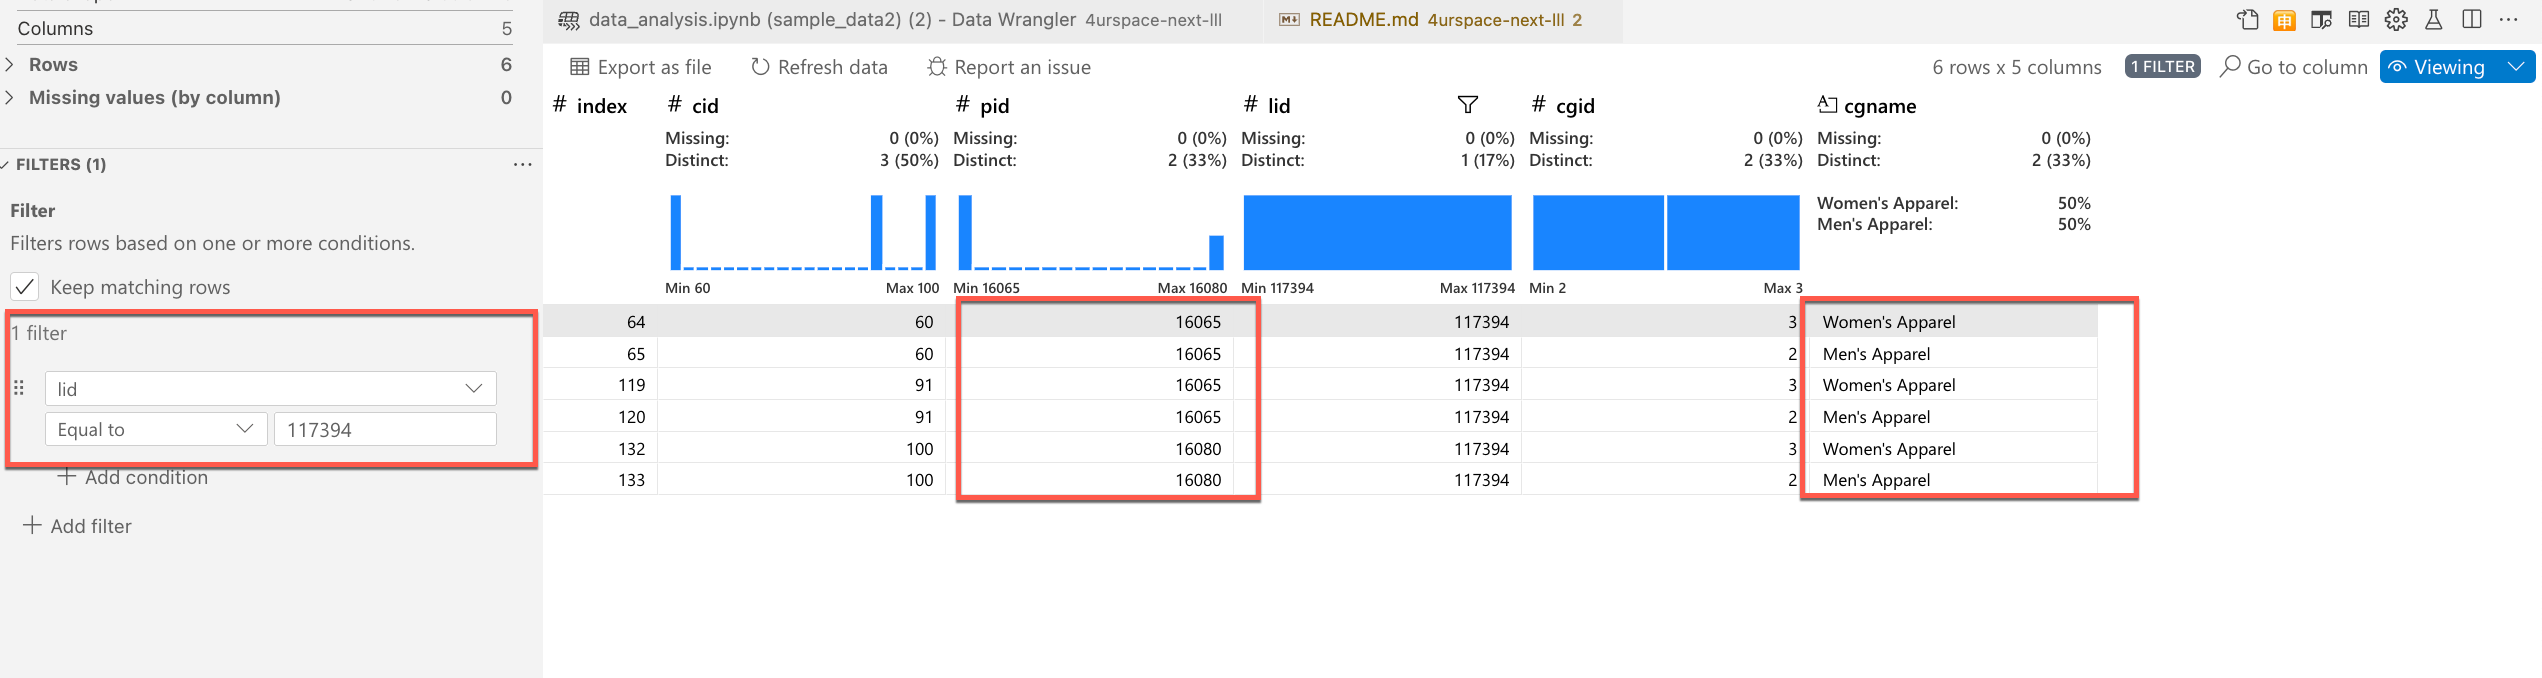

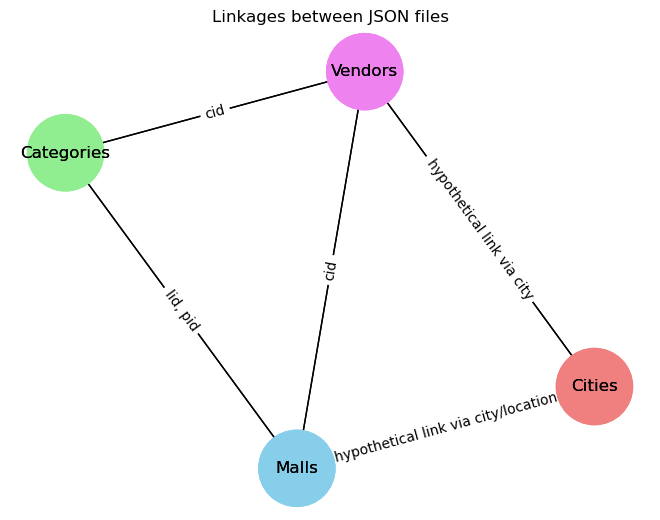

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph
G = nx.Graph()

# Adding nodes for each JSON file
G.add_node("Malls", color='skyblue')
G.add_node("Categories", color='lightgreen')
G.add_node("Cities", color='lightcoral')
G.add_node("Vendors", color='violet')

# Adding edges with labels to show relationships
G.add_edge("Malls", "Categories", label='lid, pid')
G.add_edge("Malls", "Cities", label='hypothetical link via city/location')
G.add_edge("Vendors", "Cities", label='hypothetical link via city')
G.add_edge("Vendors", "Malls", label='cid')
G.add_edge("Vendors", "Categories", label='cid')

# Position nodes using a spring layout for a visually appealing structure
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=list(nx.get_node_attributes(G, 'color').values()), node_size=3000)
labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Update the graph to include the verified connection between Vendors and Malls via 'cid'


# Redraw the graph with the updated connection
nx.draw(G, pos, with_labels=True, node_color=list(nx.get_node_attributes(G, 'color').values()), node_size=3000)
labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Show the diagram
plt.title('Linkages between JSON files')
plt.show()



In [9]:
import pandas as pd


malls_path = 'temp_data/malls.csv'
# Load the data from the CSV file
data = pd.read_csv(malls_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


,cid,pid,lid,bid,brand,mid,mall,st,city,area,sc,ip
0,32,16492,19974,237,TOD'S,974,The Galleria,5085 Westheimer Rd,Houston Tx,Houston,TX,1
1,32,14592,107019,224,ETRO,6818,River Oaks District,4444 Westheimer Road,Houston Tx,GENAREA,TX,1
2,32,14022,116148,33653,Nars Cosmetics,6818,River Oaks District,4444 Westheimer Road,Houston Tx,GENAREA,TX,1
3,32,14006,116137,19777,John Hardy,6818,River Oaks District,4444 Westheimer Road,Houston Tx,GENAREA,TX,1
4,32,6784,107019,224,ETRO,6818,River Oaks District,4444 Westheimer Road,Houston Tx,GENAREA,TX,1


In [10]:


# Group data by 'cid' and 'city'
grouped_data = data.groupby(['cid', 'city'])

# Display size of each group
group_sizes = grouped_data.size().reset_index(name='counts')

# print(group_sizes)
group_sizes



,cid,city,counts
0,32,Houston Tx,11
1,45,Houston Tx,1
2,51,Houston Tx,6
3,55,Houston Tx,7
4,57,Houston Tx,1
...,...,...,...
126,6235,Houston Tx,1
127,6816,Houston Tx,1
128,7059,Houston Tx,2
129,10075,Houston Tx,3


In [6]:
# Group the data by 'cid' and 'city'
grouped_data = data.groupby(['cid', 'city']).agg('count')

# Show the grouped data
print(grouped_data)


                  pid  lid  bid  brand  mid  mall  st  area  sc  ip
cid   city                                                         
32    Houston Tx   11   11   11     11   11    11  11    11  11  11
45    Houston Tx    1    1    1      1    1     1   1     1   1   1
51    Houston Tx    6    6    6      6    6     6   6     6   6   6
55    Houston Tx    7    7    7      7    7     7   7     7   7   7
57    Houston Tx    1    1    1      1    1     1   1     1   1   1
...               ...  ...  ...    ...  ...   ...  ..   ...  ..  ..
6235  Houston Tx    1    1    1      1    1     0   1     1   1   1
6816  Houston Tx    1    1    1      1    1     1   1     1   1   1
7059  Houston Tx    2    2    2      2    2     2   2     2   2   2
10075 Houston Tx    3    3    3      3    3     3   3     3   3   3
11028 Houston Tx    1    1    1      1    1     1   1     1   1   1

[131 rows x 10 columns]
